In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.2, rc={"lines.linewidth": 2.5})
np.random.seed(0)

In [3]:
#Calculo do ajuste de minimos quadrados:
def chi2(x,y,yerr,a,b):
    return np.sum(((y-(a*x+b))/yerr)**2)
#Calculo dos coeficientes que minimizam chi2:
def coeffFit(x,y,yerr):
    sig2 = x.size/np.sum(1/yerr**2)
    w = np.sum(1/yerr**2)
    yw = np.sum(y/yerr**2)
    xw = np.sum(x/yerr**2)
    xyw = np.sum(x*y/yerr**2)
    x2w = np.sum(x**2/yerr**2)
    x_avg = np.sum(x)/x.size
    x2_avg = np.sum(x**2)/x.size
    
    a = (xw*yw - w*xyw)/(xw**2-x2w*w)
    b = (yw - a*xw)/w
    
    a_erro = np.sqrt(1/x.size)*np.sqrt(sig2/(x2_avg-x_avg**2))
    b_erro = np.sqrt(1/x.size)*np.sqrt(sig2*x2_avg/(x2_avg-x_avg**2))
    
    return a,b,a_erro,b_erro

#Scipy implementation (same as least squares for linear functions)
def scipyFit(x,y,yerr):
    def f(xpt,a,b):
        return a*x + b
    
    from scipy.optimize import curve_fit
    fit = curve_fit(f,x,y,sigma=yerr,p0=[1.,1.])
    a,b  = fit[0]
    a_erro,b_erro = np.sqrt(np.diag(fit[1])) #Coefficient uncertainties
    return a,b,a_erro,b_erro

In [4]:
#Valores reais:
n = 10
a = 0.2
b = 0.7
x = np.linspace(1,10,n)
y = a*x + b

In [5]:
#Valores medidos (ruido gaussiano)
x_exp = x
y_erro = np.abs(np.random.normal(scale=0.15,size=x.size))
y_exp = y + np.array([np.random.normal(scale=yerr) for yerr in y_erro])

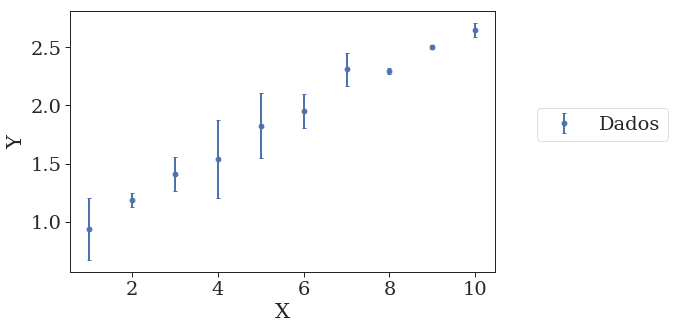

In [6]:
fig = plt.figure(figsize=(10,5))
plt.errorbar(x_exp,y_exp,yerr=y_erro,capsize=2,elinewidth=2,linewidth=2,fmt='o',label='Dados' )
plt.legend(loc=(1.1,0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.savefig("Dados.png")
plt.show()

In [7]:
aFit,bFit,aFit_erro,bFit_erro = coeffFit(x_exp,y_exp,y_erro)
print('Ajuste: a = %1.3g +- %1.1g, b = %1.3g +- %1.1g' %(aFit,aFit_erro,bFit,bFit_erro))
print('chi-2 ajuste = %1.3g' %chi2(x_exp,y_exp,y_erro,aFit,bFit))
yFit = aFit*x_exp + bFit

Ajuste: a = 0.187 +- 0.004, b = 0.816 +- 0.03
chi-2 ajuste = 3


In [8]:
aFits,bFits,aFit_erros,bFit_erros = scipyFit(x_exp,y_exp,y_erro)
print('Scipy:\n Ajuste: a = %1.3g +- %1.1g, b = %1.3g +- %1.1g' %(aFits,aFit_erros,bFits,bFit_erros))
print('chi-2 ajuste = %1.3g' %chi2(x_exp,y_exp,y_erro,aFits,bFits))

Scipy:
 Ajuste: a = 0.187 +- 0.005, b = 0.816 +- 0.04
chi-2 ajuste = 3


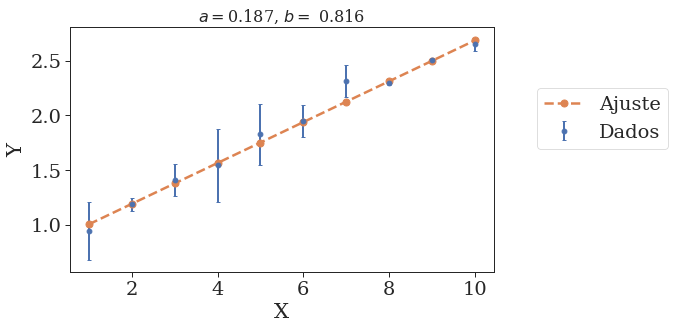

In [9]:
fig = plt.figure(figsize=(10,5))
plt.errorbar(x_exp,y_exp,yerr=y_erro,capsize=2,elinewidth=2,linewidth=2,fmt='o',label='Dados')
# plt.plot(x_exp,y,'-',label='Modelo')
plt.plot(x_exp,yFit,'o--',label='Ajuste',markersize=7)
plt.legend(loc=(1.1,0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r"$a = $%1.3g, $b = $ %1.3g" %(aFit,bFit),
          fontsize=16)
# plt.title(r"$a_{fit} = $%1.3g, $b_{fit} = $ %1.3g (residual = %1.4g)" %(aFit,bFit,chi2(x_exp,y_exp,y_erro,aFit,bFit)),
#           fontsize=16)
plt.tight_layout()
plt.savefig("minimos2Fit.png")
plt.show()

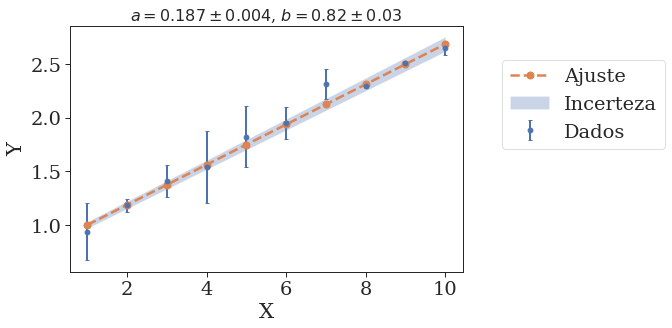

In [14]:
yFitmax = (aFit+aFit_erro)*x_exp + (bFit+bFit_erro)
yFitmin = (aFit-aFit_erro)*x_exp + (bFit-bFit_erro)
fig = plt.figure(figsize=(10,5))
plt.errorbar(x_exp,y_exp,yerr=y_erro,capsize=2,elinewidth=2,linewidth=2,fmt='o',label='Dados')
plt.plot(x_exp,yFit,'o--',label='Ajuste',markersize=7)
plt.fill_between(x_exp,yFitmin,yFitmax,alpha=0.3,label='Incerteza')
plt.legend(loc=(1.1,0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r"$a = %1.3g \pm %1.1g$, $b = %1.2g \pm %1.1g $" %(aFit,aFit_erro,bFit,bFit_erro),
          fontsize=16)
# plt.title(r"$a_{fit} = $%1.3g, $b_{fit} = $ %1.3g (residual = %1.4g)" %(aFit,bFit,chi2(x_exp,y_exp,y_erro,aFit,bFit)),
#           fontsize=16)
plt.tight_layout()
plt.savefig("minimos2FitError.png")
plt.show()

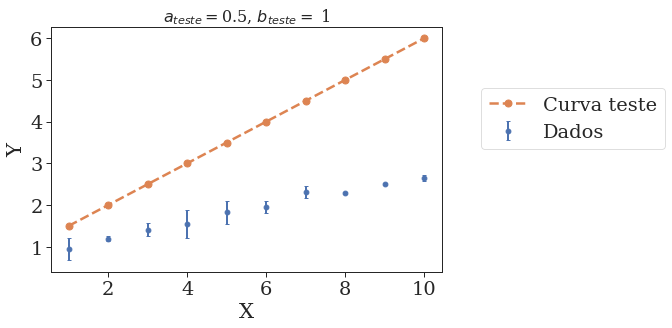

chi2= 55306.44534849715


In [11]:
aGuess, bGuess = 0.5,1.0
yGuess = aGuess*x_exp + bGuess
fig = plt.figure(figsize=(10,5))
plt.errorbar(x_exp,y_exp,yerr=y_erro,capsize=2,elinewidth=2,linewidth=2,fmt='o',label='Dados')
# plt.plot(x_exp,y,'-',label='Modelo')
plt.plot(x_exp,yGuess,'o--',label='Curva teste',markersize=7)
plt.legend(loc=(1.1,0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r"$a_{teste} = $%1.3g, $b_{teste} =$ %1.3g" %(aGuess,bGuess),
          fontsize=16)
# plt.title(r"$a_{teste} = $%1.3g, $b_{teste} =$ %1.3g (residual = %1.4g)" %(aGuess,bGuess,chi2(x_exp,y_exp,y_erro,aGuess,bGuess)),
#           fontsize=16)
plt.tight_layout()
plt.savefig("minimos2GuessA.png")
plt.show()
print('chi2=',chi2(x_exp,y_exp,y_erro,aGuess,bGuess))

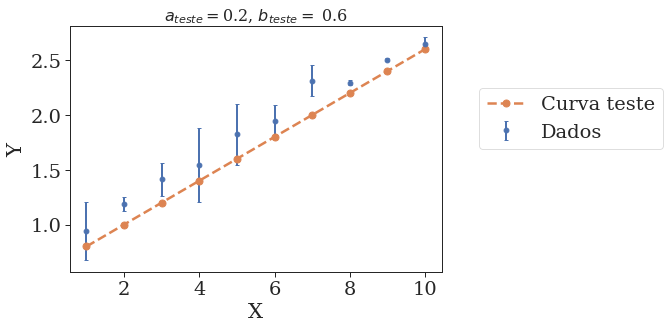

chi2= 82.84411716704574


In [12]:
aGuess, bGuess = 0.2,0.6
yGuess = aGuess*x_exp + bGuess
fig = plt.figure(figsize=(10,5))
plt.errorbar(x_exp,y_exp,yerr=y_erro,capsize=2,elinewidth=2,linewidth=2,fmt='o',label='Dados')
# plt.plot(x_exp,y,'-',label='Modelo')
plt.plot(x_exp,yGuess,'o--',label='Curva teste',markersize=7)
plt.legend(loc=(1.1,0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r"$a_{teste} = $%1.3g, $b_{teste} =$ %1.3g" %(aGuess,bGuess),
          fontsize=16)
plt.tight_layout()
plt.savefig("minimos2GuessB.png")
plt.show()
print('chi2=',chi2(x_exp,y_exp,y_erro,aGuess,bGuess))

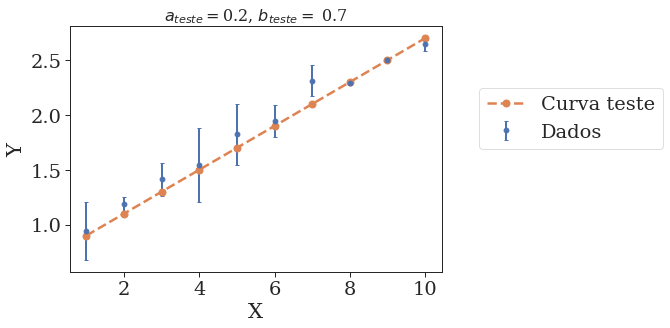

chi2= 6.139849446063731


In [13]:
aGuess, bGuess = 0.2,0.7
yGuess = aGuess*x_exp + bGuess
fig = plt.figure(figsize=(10,5))
plt.errorbar(x_exp,y_exp,yerr=y_erro,capsize=2,elinewidth=2,linewidth=2,fmt='o',label='Dados')
# plt.plot(x_exp,y,'-',label='Modelo')
plt.plot(x_exp,yGuess,'o--',label='Curva teste',markersize=7)
plt.legend(loc=(1.1,0.5))
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r"$a_{teste} = $%1.3g, $b_{teste} =$ %1.3g" %(aGuess,bGuess),
          fontsize=16)
plt.tight_layout()
plt.savefig("minimos2GuessC.png")
plt.show()
print('chi2=',chi2(x_exp,y_exp,y_erro,aGuess,bGuess))